In [43]:
# Import Pandas and Numpy to provide DataFrame support
# Import Folium for maps
import pandas as pd
import numpy as np
import folium

## Import and processing Los Angeles Crime dataset

This dataset reflects reported incidents of crime from Los Angeles between 2010 and 2015. The data is obtained from Kaggle but the general source is the Police Department of Los Angeles. The dataset was very big so I extracted the fields of interest and used only the data from 2018 and 2019.

## import of Los Angeles crime data set 2018 until june 2019

The full dataset, 2010 to present contains over 10M rows. 
I only use the 2018 en 2019 data, 326198 records, will be used. I want to use the columns below and these are only imported

In [44]:
# Read from local machine
df_losangeles = pd.read_excel('LACRIMERED2018.xlsx',
                              sheet_name='LosAngeles2018')
print('Data Los Angeles downloaded and read into a dataframe!')

Data Los Angeles downloaded and read into a dataframe!


In [45]:
#display of the fielde and datatypes of los angeles dataframe
df_losangeles.dtypes

Case_id                          int64
DateOccurred            datetime64[ns]
YearOccured                      int64
MonthOccurred                    int64
Year_Month                      object
Time Occurred                   object
AreaName                        object
CrimeCodeDescription            object
VictimAge                        int64
VictimSex                       object
latitude                       float64
longitude                      float64
Unnamed: 12                    float64
Unnamed: 13                     object
dtype: object

In [46]:
# viewing first five lines
df_losangeles.head()

Case_id DateOccurred  YearOccured  MonthOccurred Year_Month  \
0  180100513   2018-01-05         2018              1    2018-01   
1  180100514   2018-01-05         2018              1    2018-01   
2  180100516   2018-01-05         2018              1    2018-01   
3  180100525   2018-01-05         2018              1    2018-01   
4  180100526   2018-01-05         2018              1    2018-01   

  Time Occurred AreaName                               CrimeCodeDescription  \
0         16:15  Central                           BATTERY - SIMPLE ASSAULT   
1         16:25  Central     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
2         15:30  Central  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
3         18:30  Central                           BATTERY - SIMPLE ASSAULT   
4         18:30  Central                           BATTERY - SIMPLE ASSAULT   

   VictimAge VictimSex  latitude  longitude  Unnamed: 12 Unnamed: 13  
0         52         M    34.328  -118.2647          NaN         NaN  
1         37         F    34.428  -118.2532          NaN         NaN  
2         17         M    34.454  -118.2422          NaN         NaN  
3         49         M    34.487  -118.2588          NaN         NaN  
4         25         F    34.487  -118.2588          NaN         NaN

In [47]:
# viewing last five lines
df_losangeles.tail()

Case_id DateOccurred  YearOccured  MonthOccurred Year_Month  \
326192  192111876   2019-06-17         2019              6    2019-06   
326193  192111879   2019-06-11         2019              6    2019-06   
326194  192111880   2019-06-21         2019              6    2019-06   
326195  192111882   2019-06-22         2019              6    2019-06   
326196  192111884   2019-06-21         2019              6    2019-06   

       Time Occurred AreaName  \
326192          15:0  Topanga   
326193          23:0  Topanga   
326194          17:0  Topanga   
326195          5:30  Topanga   
326196          12:5  Topanga   

                                     CrimeCodeDescription  VictimAge  \
326192                                        TRESPASSING         25   
326193  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         35   
326194                                           BURGLARY         68   
326195                                        TRESPASSING         50   
326196           SHOPLIFTING - PETTY THEFT ($950 & UNDER)         35   

       VictimSex  latitude  longitude  Unnamed: 12 Unnamed: 13  
326192         F   34.1912  -118.5941          NaN         NaN  
326193         M   34.1883  -118.6274          NaN         NaN  
326194         M   34.2044  -118.5738          NaN         NaN  
326195         M   34.1604  -118.5884          NaN         NaN  
326196         M   34.1883  -118.6274          NaN         NaN

In [48]:
# show the dimensions of the dataframe
print(df_losangeles.shape)

(326197, 14)


The sample data file were download begin July of 2019. Ten years is too much for this excercise. I use 2018 and 2019 data, so a periode of 18 months which are the most recent data. 

## Data Visualisaton
### number of crimes per month

In [50]:
#import of matplotlib for creating a new dataframe df_counts
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.1.1


In [51]:
df_counts = df_losangeles['Year_Month'].value_counts()

In [52]:
#creating new index to get Year_Month ascending
new_index = []
for ym in df_counts.index:
    print(ym)
    print(type(ym))
    if len(ym) == 6:
        new_label = '{}-0{}'.format(ym[0:4],ym[5])
    else:
        new_label = ym
    new_index.append(new_label)
print(new_index)
df_counts.index = new_index
print(df_counts)

2018-05
<class 'str'>
2018-07
<class 'str'>
2018-08
<class 'str'>
2018-10
<class 'str'>
2018-01
<class 'str'>
2018-06
<class 'str'>
2018-04
<class 'str'>
2018-03
<class 'str'>
2018-12
<class 'str'>
2018-11
<class 'str'>
2019-03
<class 'str'>
2018-09
<class 'str'>
2019-05
<class 'str'>
2019-01
<class 'str'>
2019-04
<class 'str'>
2018-02
<class 'str'>
2019-02
<class 'str'>
2019-06
<class 'str'>
['2018-05', '2018-07', '2018-08', '2018-10', '2018-01', '2018-06', '2018-04', '2018-03', '2018-12', '2018-11', '2019-03', '2018-09', '2019-05', '2019-01', '2019-04', '2018-02', '2019-02', '2019-06']
2018-05    19822
2018-07    19682
2018-08    19499
2018-10    19316
2018-01    19130
2018-06    19100
2018-04    19026
2018-03    18915
2018-12    18689
2018-11    18433
2019-03    18416
2018-09    18271
2019-05    17776
2019-01    17771
2019-04    17371
2018-02    17024
2019-02    15904
2019-06    12052
Name: Year_Month, dtype: int64


In [53]:
# all counts per month are sorted in the right order
df_counts = df_counts.sort_index()
print(df_counts)

2018-01    19130
2018-02    17024
2018-03    18915
2018-04    19026
2018-05    19822
2018-06    19100
2018-07    19682
2018-08    19499
2018-09    18271
2018-10    19316
2018-11    18433
2018-12    18689
2019-01    17771
2019-02    15904
2019-03    18416
2019-04    17371
2019-05    17776
2019-06    12052
Name: Year_Month, dtype: int64


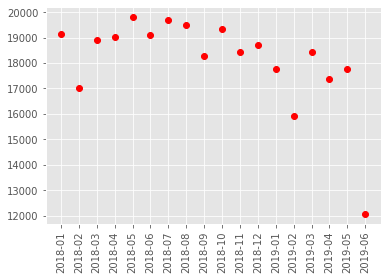

In [17]:
# plot of crime cese amount per month of the year
plt.xticks(rotation='vertical')
plt.plot(df_counts.index,df_counts.values, 'ro')

<BarContainer object of 18 artists>

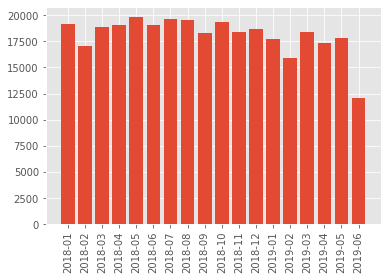

In [54]:
#barchart of crime case amounts per month
plt.xticks(rotation='vertical')
plt.bar(df_counts.index,df_counts.values)

In [55]:
#extracting from field DateOccurred the weekday
df_losangeles['weekday'] = df_losangeles['DateOccurred'].dt.dayofweek
df_losangeles

Case_id DateOccurred  YearOccured  MonthOccurred Year_Month  \
0       180100513   2018-01-05         2018              1    2018-01   
1       180100514   2018-01-05         2018              1    2018-01   
2       180100516   2018-01-05         2018              1    2018-01   
3       180100525   2018-01-05         2018              1    2018-01   
4       180100526   2018-01-05         2018              1    2018-01   
...           ...          ...          ...            ...        ...   
326192  192111876   2019-06-17         2019              6    2019-06   
326193  192111879   2019-06-11         2019              6    2019-06   
326194  192111880   2019-06-21         2019              6    2019-06   
326195  192111882   2019-06-22         2019              6    2019-06   
326196  192111884   2019-06-21         2019              6    2019-06   

       Time Occurred AreaName  \
0              16:15  Central   
1              16:25  Central   
2              15:30  Central   
3              18:30  Central   
4              18:30  Central   
...              ...      ...   
326192          15:0  Topanga   
326193          23:0  Topanga   
326194          17:0  Topanga   
326195          5:30  Topanga   
326196          12:5  Topanga   

                                     CrimeCodeDescription  VictimAge  \
0                                BATTERY - SIMPLE ASSAULT         52   
1          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         37   
2       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...         17   
3                                BATTERY - SIMPLE ASSAULT         49   
4                                BATTERY - SIMPLE ASSAULT         25   
...                                                   ...        ...   
326192                                        TRESPASSING         25   
326193  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         35   
326194                                           BURGLARY         68   
326195                                        TRESPASSING         50   
326196           SHOPLIFTING - PETTY THEFT ($950 & UNDER)         35   

       VictimSex  latitude  longitude  Unnamed: 12 Unnamed: 13  weekday  
0              M   34.3280  -118.2647          NaN         NaN        4  
1              F   34.4280  -118.2532          NaN         NaN        4  
2              M   34.4540  -118.2422          NaN         NaN        4  
3              M   34.4870  -118.2588          NaN         NaN        4  
4              F   34.4870  -118.2588          NaN         NaN        4  
...          ...       ...        ...          ...         ...      ...  
326192         F   34.1912  -118.5941          NaN         NaN        0  
326193         M   34.1883  -118.6274          NaN         NaN        1  
326194         M   34.2044  -118.5738          NaN         NaN        4  
326195         M   34.1604  -118.5884          NaN         NaN        5  
326196         M   34.1883  -118.6274          NaN         NaN        4  

[326197 rows x 15 columns]

4    49391
5    47196
0    46936
3    46304
2    46228
1    45229
6    44913
Name: weekday, dtype: int64


<BarContainer object of 7 artists>

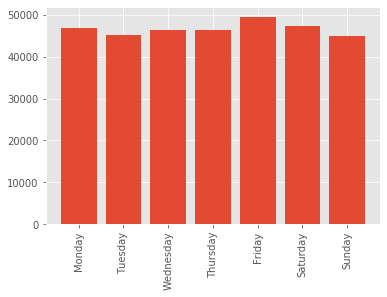

In [19]:
# creating a new dataframe df_counts for counting per weekday
df_counts = df_losangeles['weekday'].value_counts()
print(df_counts)
df_counts = df_counts.sort_index()
plt.xticks(rotation='vertical')
#creating a barchart per weekday, Monday=0
plt.bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],df_counts.values)

In [57]:
#extracting from field Time Occured the hour of the day and creating an extra column in df_losangeles 'houroftheday'
df_losangeles['houroftheday'] = df_losangeles['Time Occurred'].astype(str).str.split(":")
df_losangeles.houroftheday=df_losangeles.houroftheday.map(lambda x: x[0])
df_losangeles['houroftheday']=pd.to_numeric(df_losangeles['houroftheday'])
df_losangeles

Case_id DateOccurred  YearOccured  MonthOccurred Year_Month  \
0       180100513   2018-01-05         2018              1    2018-01   
1       180100514   2018-01-05         2018              1    2018-01   
2       180100516   2018-01-05         2018              1    2018-01   
3       180100525   2018-01-05         2018              1    2018-01   
4       180100526   2018-01-05         2018              1    2018-01   
...           ...          ...          ...            ...        ...   
326192  192111876   2019-06-17         2019              6    2019-06   
326193  192111879   2019-06-11         2019              6    2019-06   
326194  192111880   2019-06-21         2019              6    2019-06   
326195  192111882   2019-06-22         2019              6    2019-06   
326196  192111884   2019-06-21         2019              6    2019-06   

       Time Occurred AreaName  \
0              16:15  Central   
1              16:25  Central   
2              15:30  Central   
3              18:30  Central   
4              18:30  Central   
...              ...      ...   
326192          15:0  Topanga   
326193          23:0  Topanga   
326194          17:0  Topanga   
326195          5:30  Topanga   
326196          12:5  Topanga   

                                     CrimeCodeDescription  VictimAge  \
0                                BATTERY - SIMPLE ASSAULT         52   
1          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         37   
2       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...         17   
3                                BATTERY - SIMPLE ASSAULT         49   
4                                BATTERY - SIMPLE ASSAULT         25   
...                                                   ...        ...   
326192                                        TRESPASSING         25   
326193  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         35   
326194                                           BURGLARY         68   
326195                                        TRESPASSING         50   
326196           SHOPLIFTING - PETTY THEFT ($950 & UNDER)         35   

       VictimSex  latitude  longitude  Unnamed: 12 Unnamed: 13  weekday  \
0              M   34.3280  -118.2647          NaN         NaN        4   
1              F   34.4280  -118.2532          NaN         NaN        4   
2              M   34.4540  -118.2422          NaN         NaN        4   
3              M   34.4870  -118.2588          NaN         NaN        4   
4              F   34.4870  -118.2588          NaN         NaN        4   
...          ...       ...        ...          ...         ...      ...   
326192         F   34.1912  -118.5941          NaN         NaN        0   
326193         M   34.1883  -118.6274          NaN         NaN        1   
326194         M   34.2044  -118.5738          NaN         NaN        4   
326195         M   34.1604  -118.5884          NaN         NaN        5   
326196         M   34.1883  -118.6274          NaN         NaN        4   

        houroftheday  
0                 16  
1                 16  
2                 15  
3                 18  
4                 18  
...              ...  
326192            15  
326193            23  
326194            17  
326195             5  
326196            12  

[326197 rows x 16 columns]

In [21]:
#updated fields and datatypes of df_losangeles
df_losangeles.dtypes

DRNr                             int64
DateOccurred            datetime64[ns]
YearOccured                      int64
MonthOccurred                    int64
Year_Month                      object
Time Occurred                   object
AreaName                        object
CrimeCodeDescription            object
VictimAge                        int64
VictimSex                       object
latitude                       float64
longitude                      float64
weekday                          int64
houroftheday                     int64
dtype: object

0     12503
1      9328
2      8009
3      6567
4      5139
5      4854
6      6078
7      8379
8     12788
9     12325
10    14096
11    13922
12    22939
13    14535
14    15990
15    17043
16    17366
17    18884
18    19702
19    18895
20    18985
21    17185
22    16279
23    14406
Name: houroftheday, dtype: int64


<BarContainer object of 24 artists>

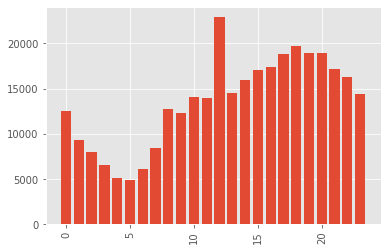

In [22]:
#count per hour the amount of crimes, sort per hour, display in barchart
df_counts = df_losangeles['houroftheday'].value_counts()
df_counts = df_counts.sort_index()
plt.xticks(rotation='vertical')
print(df_counts)
plt.bar(df_counts.index,df_counts.values)

In [60]:
#extract the description of CrimeCodeDescription and put in a new field 'CrimeCodeDescriptionshort'
#import re
df_losangeles['CrimeCodeDescriptionshort'] = df_losangeles['CrimeCodeDescription'].astype(str).str.split("-|,")
df_losangeles.CrimeCodeDescriptionshort=df_losangeles.CrimeCodeDescriptionshort.map(lambda x: x[0])
df_losangeles

Case_id DateOccurred  YearOccured  MonthOccurred Year_Month  \
0       180100513   2018-01-05         2018              1    2018-01   
1       180100514   2018-01-05         2018              1    2018-01   
2       180100516   2018-01-05         2018              1    2018-01   
3       180100525   2018-01-05         2018              1    2018-01   
4       180100526   2018-01-05         2018              1    2018-01   
...           ...          ...          ...            ...        ...   
326192  192111876   2019-06-17         2019              6    2019-06   
326193  192111879   2019-06-11         2019              6    2019-06   
326194  192111880   2019-06-21         2019              6    2019-06   
326195  192111882   2019-06-22         2019              6    2019-06   
326196  192111884   2019-06-21         2019              6    2019-06   

       Time Occurred AreaName  \
0              16:15  Central   
1              16:25  Central   
2              15:30  Central   
3              18:30  Central   
4              18:30  Central   
...              ...      ...   
326192          15:0  Topanga   
326193          23:0  Topanga   
326194          17:0  Topanga   
326195          5:30  Topanga   
326196          12:5  Topanga   

                                     CrimeCodeDescription  VictimAge  \
0                                BATTERY - SIMPLE ASSAULT         52   
1          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         37   
2       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...         17   
3                                BATTERY - SIMPLE ASSAULT         49   
4                                BATTERY - SIMPLE ASSAULT         25   
...                                                   ...        ...   
326192                                        TRESPASSING         25   
326193  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         35   
326194                                           BURGLARY         68   
326195                                        TRESPASSING         50   
326196           SHOPLIFTING - PETTY THEFT ($950 & UNDER)         35   

       VictimSex  latitude  longitude  Unnamed: 12 Unnamed: 13  weekday  \
0              M   34.3280  -118.2647          NaN         NaN        4   
1              F   34.4280  -118.2532          NaN         NaN        4   
2              M   34.4540  -118.2422          NaN         NaN        4   
3              M   34.4870  -118.2588          NaN         NaN        4   
4              F   34.4870  -118.2588          NaN         NaN        4   
...          ...       ...        ...          ...         ...      ...   
326192         F   34.1912  -118.5941          NaN         NaN        0   
326193         M   34.1883  -118.6274          NaN         NaN        1   
326194         M   34.2044  -118.5738          NaN         NaN        4   
326195         M   34.1604  -118.5884          NaN         NaN        5   
326196         M   34.1883  -118.6274          NaN         NaN        4   

        houroftheday   CrimeCodeDescriptionshort  
0                 16                    BATTERY   
1                 16  ASSAULT WITH DEADLY WEAPON  
2                 15                  VANDALISM   
3                 18                    BATTERY   
4                 18                    BATTERY   
...              ...                         ...  
326192            15                 TRESPASSING  
326193            23                       THEFT  
326194            17                    BURGLARY  
326195             5                 TRESPASSING  
326196            12                SHOPLIFTING   

[326197 rows x 17 columns]

VANDALISM                     30876
BATTERY                       28235
BURGLARY FROM VEHICLE         26389
VEHICLE                       24696
THEFT PLAIN                   22697
BURGLARY                      22434
INTIMATE PARTNER              22045
THEFT FROM MOTOR VEHICLE      20925
ASSAULT WITH DEADLY WEAPON    15714
THEFT                         13883
Name: CrimeCodeDescriptionshort, dtype: int64


<BarContainer object of 10 artists>

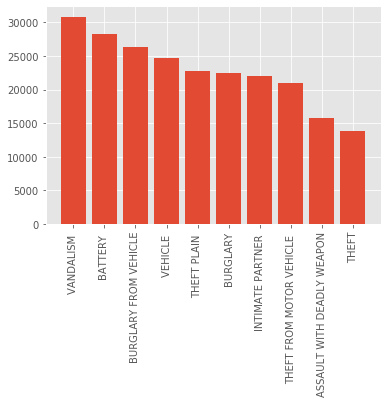

In [24]:
#count the top 10 sort of crime using the field CrimeCodeDescriptionshort​ and show in barchart descending
df_counts = df_losangeles['CrimeCodeDescriptionshort'].value_counts()
df_counts = df_counts.sort_values(ascending=False).head(10)
plt.xticks(rotation='vertical')
print(df_counts)
plt.bar(df_counts.index,df_counts.values)

In [35]:
#create a new dataframe crime
df_crime=df_losangeles[df_losangeles.CrimeCodeDescriptionshort.isin(df_counts.index)]
df_crime.shape[0]

227894

In [61]:
df_crime.dtypes

DRNr                                  int64
DateOccurred                 datetime64[ns]
YearOccured                           int64
MonthOccurred                         int64
Year_Month                           object
Time Occurred                        object
AreaName                             object
CrimeCodeDescription                 object
VictimAge                             int64
VictimSex                            object
latitude                            float64
longitude                           float64
weekday                               int64
houroftheday                          int64
CrimeCodeDescriptionshort            object
dtype: object

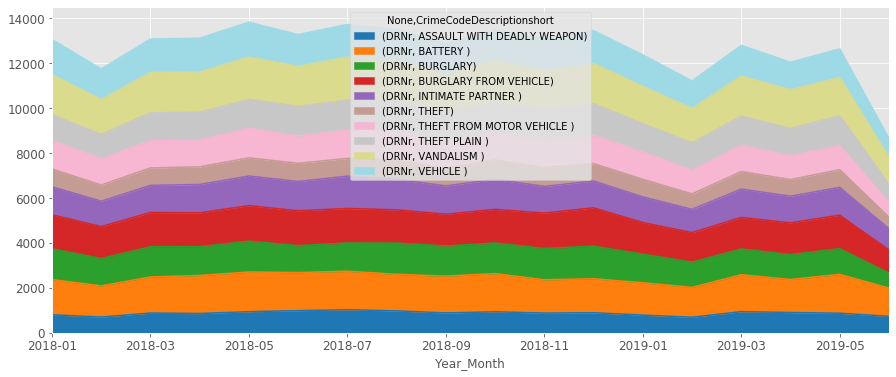

In [62]:
df_crime[['DRNr', 'CrimeCodeDescriptionshort', 'Year_Month']].pivot_table(
    index='Year_Month', 
    columns='CrimeCodeDescriptionshort', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

Text(0.0, 1.0, 'Count of Cases Per Hour]')

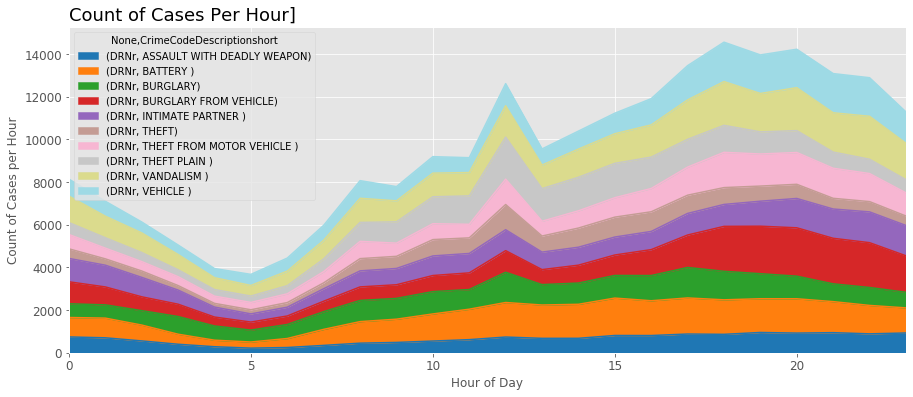

In [63]:
df_crime[['DRNr', 'CrimeCodeDescriptionshort', 'houroftheday']].pivot_table(
    index='houroftheday', 
    columns='CrimeCodeDescriptionshort', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

VANDALISM                     30876
BATTERY                       28235
BURGLARY FROM VEHICLE         26389
VEHICLE                       24696
THEFT PLAIN                   22697
BURGLARY                      22434
INTIMATE PARTNER              22045
THEFT FROM MOTOR VEHICLE      20925
ASSAULT WITH DEADLY WEAPON    15714
THEFT                         13883
Name: CrimeCodeDescriptionshort, dtype: int64


<BarContainer object of 10 artists>

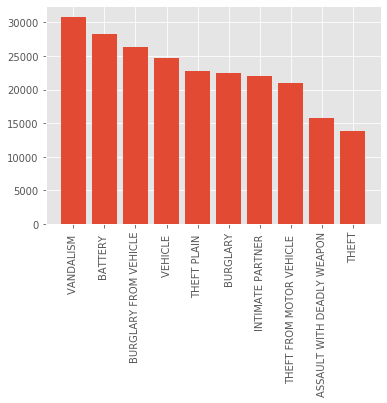

In [110]:
#count the top 3 sort of crime using the field CrimeCodeDescriptionshort​ and show in barchart descending
df_counts = df_losangeles['CrimeCodeDescriptionshort'].value_counts()
df_counts = df_counts.sort_values(ascending=False).head(10)
plt.xticks(rotation='vertical')
print(df_counts)
plt.bar(df_counts.index,df_counts.values)

In [115]:
#create a new dataframe crime
df_crimeshort=df_losangeles[df_losangeles.CrimeCodeDescriptionshort.isin(df_counts.index)]
df_crimeshort.shape[0]

227894

In [118]:
#df_crimeshort dataframe contains too many points to disply effeciently using Folium. I will only use the month december 2018
df_crimeshort_december = df_crimeshort[df_crimeshort.MonthOccurred == 12]

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_crimeshort_december.to_pickle('crimes_december.pkl')
df_crimeshort_december.shape

(13446, 17)

In [81]:
import folium

In [119]:
# Create a list of colours and use the already made list of 10 crimes
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a colour dictionary  to map to the crimes
dict_colours = dict(zip(df_counts.index, colors))

# Add the colours colums to the df_top_crimes DataFrame
df_crimeshort_december['colour'] = df_crimeshort.CrimeCodeDescriptionshort.map(dict_colours)
df_crimeshort_december

C:\Users\renes\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Case_id DateOccurred  YearOccured  MonthOccurred Year_Month  \
208220  180101178   2018-12-03         2018             12    2018-12   
208222  180101184   2018-12-08         2018             12    2018-12   
208223  180101185   2018-12-08         2018             12    2018-12   
208224  180101186   2018-12-11         2018             12    2018-12   
208228  180101190   2018-12-13         2018             12    2018-12   
...           ...          ...          ...            ...        ...   
226898  192109003   2018-12-14         2018             12    2018-12   
226900  192109972   2018-12-30         2018             12    2018-12   
226901  192110146   2018-12-01         2018             12    2018-12   
226902  192110306   2018-12-01         2018             12    2018-12   
226904  192110398   2018-12-01         2018             12    2018-12   

       Time Occurred AreaName  \
208220          22:0  Central   
208222         23:55  Central   
208223          17:5  Central   
208224         12:35  Central   
208228          14:5  Central   
...              ...      ...   
226898          17:0  Topanga   
226900          13:0  Topanga   
226901          12:0  Topanga   
226902          20:0  Topanga   
226904          12:0  Topanga   

                                     CrimeCodeDescription  VictimAge  \
208220     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         52   
208222     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         31   
208223     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         29   
208224     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         17   
208228                           BATTERY - SIMPLE ASSAULT         66   
...                                                   ...        ...   
226898    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)          0   
226900                  INTIMATE PARTNER - SIMPLE ASSAULT         29   
226901    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)          0   
226902    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)          0   
226904  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         44   

       VictimSex  latitude  longitude  Unnamed: 12 Unnamed: 13  weekday  \
208220         F   34.4350  -118.2427          NaN         NaN        0   
208222         M   34.4030  -118.2421          NaN         NaN        5   
208223         M   34.6150  -118.2412          NaN         NaN        5   
208224         F   34.4230  -118.2595          NaN         NaN        1   
208228         F   34.5090  -118.2585          NaN         NaN        3   
...          ...       ...        ...          ...         ...      ...   
226898       NaN   34.2010  -118.5623          NaN         NaN        4   
226900         F   34.1938  -118.5906          NaN         NaN        6   
226901       NaN   34.1912  -118.5941          NaN         NaN        5   
226902       NaN   34.1921  -118.5884          NaN         NaN        5   
226904         M   34.1829  -118.6059          NaN         NaN        5   

        houroftheday   CrimeCodeDescriptionshort     colour  
208220            22  ASSAULT WITH DEADLY WEAPON  cadetblue  
208222            23  ASSAULT WITH DEADLY WEAPON  cadetblue  
208223            17  ASSAULT WITH DEADLY WEAPON  cadetblue  
208224            12  ASSAULT WITH DEADLY WEAPON  cadetblue  
208228            14                    BATTERY        blue  
...              ...                         ...        ...  
226898            17   THEFT FROM MOTOR VEHICLE        pink  
226900            13           INTIMATE PARTNER      purple  
226901            12   THEFT FROM MOTOR VEHICLE        pink  
226902            20   THEFT FROM MOTOR VEHICLE        pink  
226904            12                       THEFT      black  

[13446 rows x 18 columns]

In [132]:
# Define Los Angeles geolocation coordinates
losangeles_latitude = 34.05  
losangeles_longitude = -118.24

# Define the world map centered around Los Angeles with a higher zoom level
losangeles_map = folium.Map(location=[losangeles_latitude, losangeles_longitude], zoom_start=11)

# display world map
losangeles_map

In [121]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the crimes and add each to the incidents feature group
for lat, lng, col in zip(df_crimeshort_december.latitude, 
                         df_crimeshort_december.longitude, 
                         df_crimeshort_december.colour):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
losangeles_map.add_child(incidents)



## Import of FourSquare Data

In [90]:
install libraries fourquare and foursquare_api_tools
!pip install foursquare
!pip install git+https://github.com/dacog/foursquare_api_tools.git#egg=foursquare_api_tools
import foursquare as fs
import foursquare_api_tools as ft

  Cloning https://github.com/dacog/foursquare_api_tools.git to c:\users\renes\appdata\local\temp\pip-install-mid9yjkn\foursquare-api-tools
  Created wheel for foursquare-api-tools: filename=foursquare_api_tools-0.2-cp37-none-any.whl size=4328 sha256=045f71e5432eb7dba636d7529ef8d90791328bc06105bea023873906079d717f
  Stored in directory: C:\Users\renes\AppData\Local\Temp\pip-ephem-wheel-cache-q61fp1io\wheels\6f\3c\fd\6f3f03526dd57baad6e211d601d808ae3efd032480218ae227
Successfully built foursquare-api-tools


  Running command git clone -q https://github.com/dacog/foursquare_api_tools.git 'C:\Users\renes\AppData\Local\Temp\pip-install-mid9yjkn\foursquare-api-tools'


In [91]:
#Define Foursquare Credentials and Version
CLIENT_ID = '1IHDIL0WRL01PKUXYPJKZCF4TXM0PFH0Q01SYTX1XHYDHQZV' # your Foursquare ID
CLIENT_SECRET = 'IR04XB4GWNX2QTWLYOPL4HSRM0MMJCHKUWELL3CSZIQ4GK2H' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1IHDIL0WRL01PKUXYPJKZCF4TXM0PFH0Q01SYTX1XHYDHQZV
CLIENT_SECRET:IR04XB4GWNX2QTWLYOPL4HSRM0MMJCHKUWELL3CSZIQ4GK2H


In [92]:
# Construct the client object 
client = fs.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, version=VERSION)

In [122]:
#using the function to get the top 100 venues from Los Angeles
from foursquare_api_tools import foursquare_api_tools as ft
import pandas as pd
df_la_venues=ft.venues_explore(client,lat='34.05',lng='-118.24',limit=1000)

In [123]:
df_la_venues.head()

index                                 Address         Category  \
0      0                            329 E 1st St  Udon Restaurant   
1      0  134 Japanese Village Plaza Mall Bldg E           Bakery   
2      0            123 Astronaut E S Onizuka St        Bookstore   
3      0         118 Japanese Village Plaza Mall   Ice Cream Shop   
4      0                            315 E 1st St      Candy Store   

          City        Country   Latitude   Longitude                   Name  
0  Los Angeles  United States  34.049807 -118.240202         Marugame Monzo  
1  Los Angeles  United States  34.048869 -118.240508             Café Dulcé  
2  Los Angeles  United States  34.050145 -118.242246   Kinokuniya Bookstore  
3  Los Angeles  United States  34.048846 -118.240045               Mikawaya  
4  Los Angeles  United States  34.050196 -118.240482  Fugetsu-Do Sweet Shop

In [124]:
df_la_venues.shape

(100, 8)

In [125]:
df_la_venues.dtypes

index          int64
Address       object
Category      object
City          object
Country       object
Latitude     float64
Longitude    float64
Name          object
dtype: object

Coffee Shop            6
Bookstore              5
Bar                    5
Sushi Restaurant       5
Japanese Restaurant    4
Art Gallery            4
Ice Cream Shop         4
Brewery                4
Ramen Restaurant       3
Mexican Restaurant     3
Name: Category, dtype: int64


<BarContainer object of 10 artists>

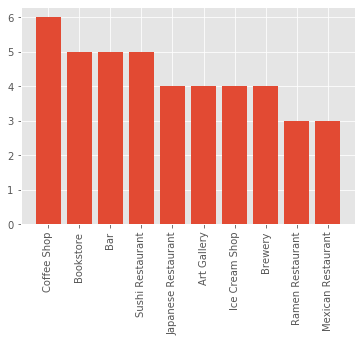

In [126]:
#count the top 10 sort of category using the field Category and show in barchart descending
df_counts = df_la_venues['Category'].value_counts()
df_counts = df_counts.sort_values(ascending=False).head(10)
plt.xticks(rotation='vertical')
print(df_counts)
plt.bar(df_counts.index,df_counts.values)

In [128]:
# Create a list of colours. 
# We have  list of the 10 categories
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]
# Create a colour dictionary  to map to the crimes
dict_colours = dict(zip(df_counts.index, colors))

# Add the colours colums to the df_la_venues DataFrame
df_la_venues['colour'] = df_la_venues.Category.map(dict_colours)
df_la_venues

index                                 Address            Category  \
0       0                            329 E 1st St     Udon Restaurant   
1       0  134 Japanese Village Plaza Mall Bldg E              Bakery   
2       0            123 Astronaut E S Onizuka St           Bookstore   
3       0         118 Japanese Village Plaza Mall      Ice Cream Shop   
4       0                            315 E 1st St         Candy Store   
..    ...                                     ...                 ...   
95      0                           524 S Main St               Diner   
96      0                          317 S Broadway  Mexican Restaurant   
97      0                           448 S Hill St   French Restaurant   
98      0                         541 S Spring St          Taco Place   
99      0                         135 N Grand Ave         Music Venue   

           City        Country   Latitude   Longitude  \
0   Los Angeles  United States  34.049807 -118.240202   
1   Los Angeles  United States  34.048869 -118.240508   
2   Los Angeles  United States  34.050145 -118.242246   
3   Los Angeles  United States  34.048846 -118.240045   
4   Los Angeles  United States  34.050196 -118.240482   
..          ...            ...        ...         ...   
95  Los Angeles  United States  34.046072 -118.249046   
96  Los Angeles  United States  34.050718 -118.248850   
97  Los Angeles  United States  34.048919 -118.251428   
98  Los Angeles  United States  34.046511 -118.250597   
99  Los Angeles  United States  34.057133 -118.248354   

                        Name  colour  
0             Marugame Monzo     NaN  
1                 Café Dulcé     NaN  
2       Kinokuniya Bookstore    blue  
3                   Mikawaya  purple  
4      Fugetsu-Do Sweet Shop     NaN  
..                       ...     ...  
95              Nickel Diner     NaN  
96     Tacos Tumbras a Tomas   black  
97                     Perch     NaN  
98                  Guisados     NaN  
99  Los Angeles Music Center     NaN  

[100 rows x 9 columns]

In [129]:
# Define Los Angeles geolocation coordinates
losangeles_latitude = 34.05  
losangeles_longitude = -118.24

# Define the world map centered around Los Angeles with a higher zoom level
losangeles_map = folium.Map(location=[losangeles_latitude, losangeles_longitude], zoom_start=11)

# Instantiate a feature group for the incidents in the dataframe
fsplaces = folium.map.FeatureGroup()

# loop through the 100 places and add each to the places to the feature group
for lat, lng, col in zip(df_la_venues.Latitude, 
                         df_la_venues.Longitude, 
                         df_la_venues.colour):
    fsplaces.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
losangeles_map.add_child(fsplaces)